# Heart Disease Classification
In this notebook we will be utilizing **FastAI's** tabular module, which allows us to build models for tabular datasets utilizing **Deep Learning** 

More on the data:

## Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Content

Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

Directly from: https://www.kaggle.com/ronitf/heart-disease-uci/home 

## What we will do 
We will first explore the data, we will then determine:
* dependent_variable - our target 
* continuous_names - numerical data 
* categorical_names - categorical data
* procs - normalization to data

Then we will convert our DataFrame into a FastAI Data object using the **Data Block API** 

Once we have this data object, we will build a Tabular Learning & experiment with different Architectures 

Lastly, we will compare with other Machine Learning Techniques & benchmarks: 
```python
Machine_Learning_Techniques = 
[['LR', 0.7912087912087912],
 ['KNN', 0.8131868131868132],
 ['SVM', 0.8461538461538461],
 ['NB', 0.8351648351648352],
 ['DT', 0.7362637362637363],
 ['RF', 0.8131868131868132]]
```

In [1]:
!pip install kaggle --upgrade

    100% |████████████████████████████████| 61kB 17.5MB/s ta 0:00:01
    100% |████████████████████████████████| 133kB 19.6MB/s ta 0:00:01
    100% |████████████████████████████████| 245kB 21.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for kaggle ... done
  Stored in directory: /root/.cache/pip/wheels/0d/58/eb/83d6a2e1935aff39d341ffa1e5faa3809e173cd0937e057d83
  Running setup.py bdist_wheel for python-slugify ... done
  Stored in directory: /root/.cache/pip/wheels/2b/9e/c8/14a18ab55d8f144384de8186a3df8401dcc9264936f71d470f
Successfully built kaggle python-slugify
  Found existing installation: urllib3 1.24.1
    Uninstalling urllib3-1.24.1:
      Successfully uninstalled urllib3-1.24.1


In [2]:
from fastai.tabular import *
import torch
import pandas as pd
import numpy as np
import os

In [6]:
# configuring kaggle
!mkdir .kaggle # we will store in this directory

cred = json.dumps({"username":"USERNAME","key":"PASSWORD"}) # change with your credentials
with open('.kaggle/kaggle.json', 'w') as f:
    f.write(cred) # writes to the .kaggle folder

# Configuring the file - we will run this twice (second time next block)
!cp .kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

cp: cannot create regular file '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/opt/conda/envs/fastai/bin/kaggle", line 7, in <module>
    from kaggle.cli import main
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/envs/fastai/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 116, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
# run for second time
!cp .kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
# downloading our data
!kaggle datasets download -d ronitf/heart-disease-uci -f heart.csv -p {path}

  0%|                                               | 0.00/11.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 11.1k/11.1k [00:00<00:00, 8.93MB/s]


In [11]:
os.listdir(path)

['heart.csv']

In [4]:
# creating our directory for data
!mkdir heart_disease_data

path = '/notebooks/course-v3/nbs/dl1/heart_disease_data'

## Exploring Data

In [12]:
# converting path into FastAI path object
path = Path(path)

In [14]:
path.ls()

[PosixPath('/notebooks/course-v3/nbs/dl1/heart_disease_data/heart.csv')]

In [16]:
df = pd.read_csv('/notebooks/course-v3/nbs/dl1/heart_disease_data/heart.csv')

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [22]:
# Let's see how many unique values each has
for c in list(df.columns):
    print(f'{c}: {df[c].nunique()}')

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [23]:
dep_var = 'target'
cat_names = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']
cont_names = ['age','trestbps', 'chol', 'thalach', 'oldpeak',]
procs = [FillMissing, Categorify, Normalize]

In [67]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(280,300)))
                           .label_from_df(cols=dep_var)
                           .databunch(bs=32))

In [60]:
data.show_batch(rows=5)

sex,cp,fbs,restecg,exang,thal,age,trestbps,chol,thalach,oldpeak,target
1,1,0,0,0,2,0.4018,-0.6424,0.7079,0.4228,0.7001,0
1,2,0,0,0,2,-0.5785,-0.7563,-1.8925,-1.0534,-0.1762,0
1,0,0,0,1,2,1.0553,-0.6424,-0.0241,-2.3559,1.0506,0
0,2,0,1,0,2,-0.4695,-0.6424,-0.5442,0.3360,0.5248,1
1,3,0,0,0,3,0.5107,2.6610,0.4382,-0.2284,2.8031,1


In [114]:
learn = tabular_learner(data, layers=[200, 200, 50], metrics=[accuracy])

In [29]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(5, 4)
    (2): Embedding(3, 3)
    (3): Embedding(4, 3)
    (4): Embedding(3, 3)
    (5): Embedding(5, 4)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=25, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


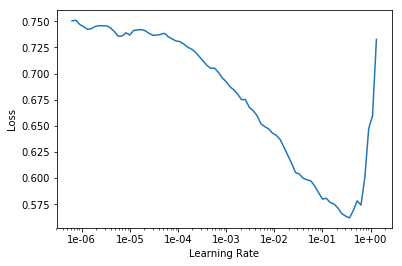

In [69]:
learn.lr_find()
learn.recorder.plot()

In [115]:
lr = 2e-2

In [116]:
learn.fit_one_cycle(4, slice(lr), wd=1e-5)

epoch,train_loss,valid_loss,accuracy
1,0.616211,0.803612,0.000000
2,0.568536,0.769155,0.550000
3,0.508021,0.467171,0.850000
4,0.461787,0.509350,0.850000


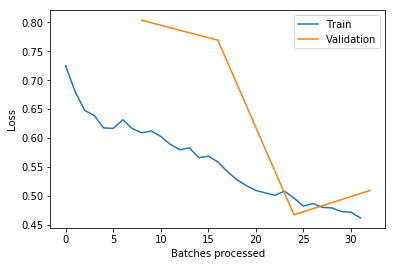

In [117]:
learn.recorder.plot_losses()

### Model fine-tune one
fine-tuning momentum

In [130]:
learn = tabular_learner(data, layers=[200, 200, 50], metrics=[accuracy])

In [128]:
lr = 2e-2

In [129]:
learn.fit_one_cycle(5, slice(lr), wd=1e-5, moms=(.90, .99))

epoch,train_loss,valid_loss,accuracy
1,0.666368,0.770287,0.150000
2,0.607901,0.250941,0.900000
3,0.539737,0.446118,0.850000
4,0.502037,0.441769,0.850000
5,0.473057,0.478724,0.750000
